In [17]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [18]:
import string
from matplotlib import pyplot as plt
from matplotlib import rcParams
import numpy as np
from pathlib import Path
import pandas as pd
from nltk.tokenize import TweetTokenizer
import re
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
# Tweet tokenizer does not split at apostophes which is what we want 
from nltk.tokenize import TweetTokenizer 
from nltk.tokenize import word_tokenize  
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import warnings

In [19]:

rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 100)
pd.set_option("display.precision", 4)
warnings.simplefilter('ignore')

In [20]:
data_dir = Path('../input/')
trn_file = data_dir / 'train.csv'
tst_file = data_dir / 'test_x.csv'

seed = 42

In [24]:
trn = pd.read_csv(trn_file, index_col=0)
print(trn.shape)
trn.head()

(54879, 2)


,text,author
index,,
0,"He was almost choking. There was so much, so m...",3
1,"“Your sister asked for it, I suppose?”",2
2,"She was engaged one day as she walked, in per...",1
3,"The captain was in the porch, keeping himself ...",4
4,"“Have mercy, gentlemen!” odin flung up his han...",3


In [25]:
from nltk.corpus import stopwords
trn['count_word']=trn["text"].apply(lambda x: len(str(x).split()))
#Unique word count
trn['count_unique_word']=trn["text"].apply(lambda x: len(set(str(x).split())))
#Letter count
trn['count_letters']=trn["text"].apply(lambda x: len(str(x)))
#punctuation count
trn["count_punctuations"] =trn["text"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
#upper case words count
trn["count_words_upper"] = trn["text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
#Number of stopwords
eng_stopwords=set(stopwords.words('english'))
trn["count_stopwords"] = trn["text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
#Average length of the words
trn["mean_word_len"] = trn["text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
trn['word_unique_percent']=trn['count_unique_word']*100/trn['count_word']
#derived features
#Punct percent in each comment:
trn['punct_percent']=trn['count_punctuations']*100/trn['count_word']

In [8]:
trn.duplicated('text')

index
0        False
1        False
2        False
3        False
4        False
         ...  
54874    False
54875    False
54876    False
54877    False
54878    False
Length: 54879, dtype: bool

In [9]:
#trn[trn['text'].str.contains("é")]
trn[trn['text'].str.contains("é")]

,text,author
index,,
460,"“O mon amante, O mon désir, Sachons cueillir ...",4
1490,"""Well... _Vous savez chez nous... En un mot,_ ...",3
2010,"She did, however, pay a visit of ceremony to t...",3
2221,There I was the witness of a revolting scene: ...,3
2887,The Sire de Malétroit odin to meet them with a...,4
...,...,...
52009,It was true that she would never have let Dash...,3
53554,“Never more--from that sweet moment-- Gazéd h...,3
53923,"“Oh, no; oh, no! Not to theology alone, I assu...",3


In [41]:
X_data = trn['text']
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_data) # 5169개의 행을 가진 X의 각 행에 토큰화를 수행
sequences = tokenizer.texts_to_sequences(X_data) # 단어를 숫자값, 인덱스로 변환하여 저장
word_to_index = tokenizer.word_index
vocab_size = len(word_to_index) + 1
print('단어 집합의 크기: {}'.format((vocab_size)))

print('단어 집합의 크기: {}'.format((vocab_size)))

단어 집합의 크기: 42331
단어 집합의 크기: 42331


In [42]:
word_to_index

{'the': 1,
 'and': 2,
 'to': 3,
 'of': 4,
 'a': 5,
 'i': 6,
 'in': 7,
 'odin': 8,
 '”': 9,
 'he': 10,
 'was': 11,
 'it': 12,
 'you': 13,
 'that': 14,
 'his': 15,
 'with': 16,
 'had': 17,
 'for': 18,
 'as': 19,
 'her': 20,
 'at': 21,
 'not': 22,
 'my': 23,
 'is': 24,
 'but': 25,
 'have': 26,
 'be': 27,
 'she': 28,
 'me': 29,
 'him': 30,
 'said': 31,
 'on': 32,
 'all': 33,
 'so': 34,
 'this': 35,
 'from': 36,
 'by': 37,
 'which': 38,
 'were': 39,
 '’': 40,
 'there': 41,
 'no': 42,
 'one': 43,
 'what': 44,
 'been': 45,
 'would': 46,
 'we': 47,
 'they': 48,
 'are': 49,
 'your': 50,
 'if': 51,
 'an': 52,
 'very': 53,
 'mr': 54,
 'could': 55,
 'do': 56,
 'out': 57,
 'will': 58,
 'when': 59,
 'up': 60,
 'or': 61,
 'upon': 62,
 'them': 63,
 'more': 64,
 'man': 65,
 'now': 66,
 'who': 67,
 'some': 68,
 "'": 69,
 'am': 70,
 'know': 71,
 '“i': 72,
 'then': 73,
 'into': 74,
 'about': 75,
 'time': 76,
 'little': 77,
 'their': 78,
 'did': 79,
 'only': 80,
 'see': 81,
 'like': 82,
 'before': 83,
 'sh

In [47]:
threshold = 2
total_cnt = len(word_to_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합(vocabulary)에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)
#희귀 단어 비율 0.6%

등장 빈도가 1번 이하인 희귀 단어의 수: 16347
단어 집합(vocabulary)에서 희귀 단어의 비율: 38.61800141743444
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.6867015891552651


메일의 최대 길이 : 472
메일의 평균 길이 : 42.933381


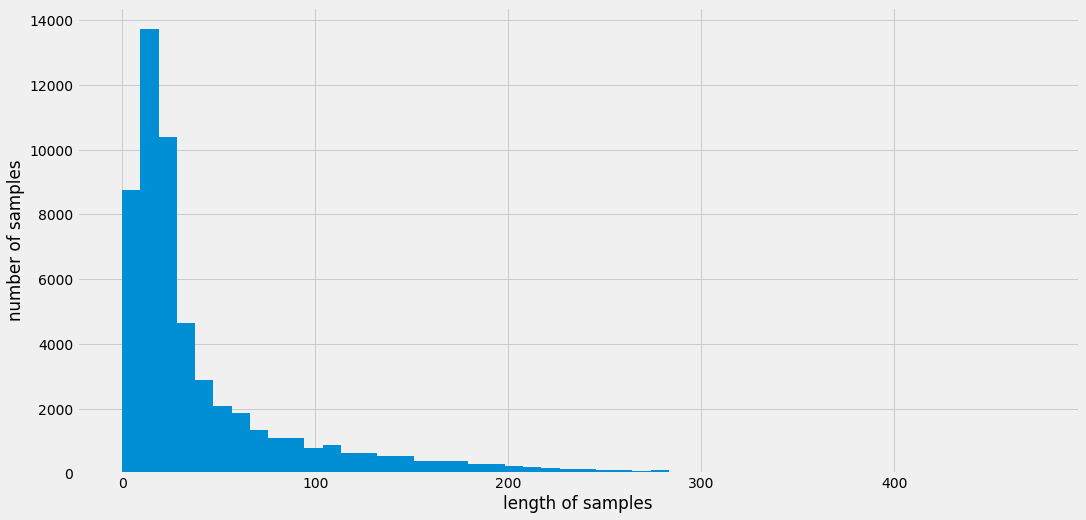

In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer

X_data = trn['text']
tokenizer =Tokenizer(num_words=20000)
tokenizer.fit_on_texts(X_data) #  X의 각 행에 토큰화를 수행
sequences = tokenizer.texts_to_sequences(X_data) # 단어를 숫자값, 인덱스로 변환하여 저장

X_data = sequences
print('문장의 최대 길이 : %d' % max(len(l) for l in X_data))
print('문장의 평균 길이 : %f' % (sum(map(len, X_data))/len(X_data)))
plt.hist([len(s) for s in X_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

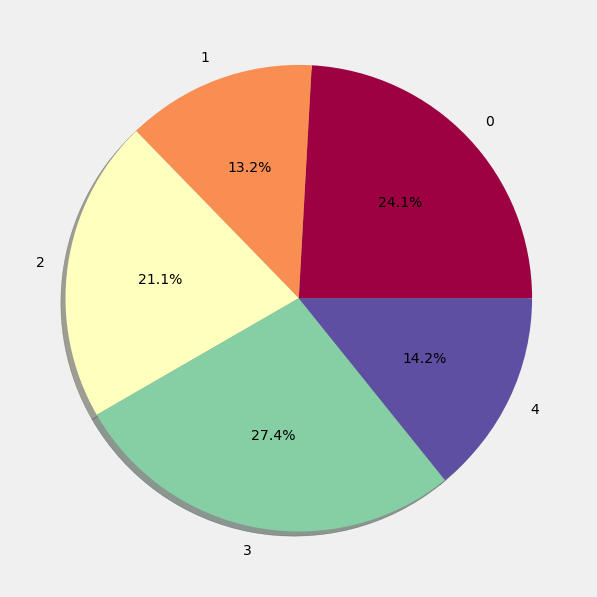

In [16]:
import numpy as np

temp = trn.groupby(['author']).count().reset_index()
temp.columns = ['author', 'count']
size = list(temp['count'])

source_labels = temp['author']
source_counts = temp['count']

# Make square figures and axes
plt.figure(1, figsize=(20,10))

cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 5)]
source_pie = plt.pie(source_counts, labels=source_labels, autopct='%1.1f%%', shadow=True, colors=colors)

plt.show()

#0번과 4번 2번이 비중이 많음

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

_ = sns.color_palette("hls", 8)

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(trn['text'], 20)

df2 = pd.DataFrame(common_words, columns = ['detail' , 'count'])
df2 = df2.groupby('detail').sum()['count'].sort_values(ascending=False).reset_index()
df2.columns = ['word', 'count']

df1.merge(df2)


plt.figure(figsize=(15,7))
ax = sns.barplot('word', y="count", data=df1,
                  saturation=.5)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_xlabel("Word (gov_policy + detail)")

TypeError: unhashable type: 'list'